In [1]:
import os
import json
from fabrictestbed.slice_manager import SliceManager, Status

In [2]:
credmgr_host = os.environ['FABRIC_CREDMGR_HOST']
orchestrator_host = os.environ['FABRIC_ORCHESTRATOR_HOST']
print(f"CM Host: {credmgr_host} Orchestrator Host: {orchestrator_host}")

CM Host: beta-2.fabric-testbed.net Orchestrator Host: beta-7.fabric-testbed.net


In [3]:
# create and initialize the slice manager

slice_manager = SliceManager(oc_host = orchestrator_host, cm_host = credmgr_host, project_name = 'all', scope = 'all')
slice_manager.initialize()

try:
    id_token, refresh_token = slice_manager.refresh_tokens()
except Exception as e:
    print("Exception occurred while getting tokens:{}".format(e))

fabric_refresh_token=slice_manager.get_refresh_token()
print()
print("New Refresh Token: {}".format(fabric_refresh_token))
print()
print("Stored new Refresh Token")
%store fabric_refresh_token


New Refresh Token: NB2HI4DTHIXS6Y3JNRXWO33OFZXXEZZPN5QXK5DIGIXTGMTFGU4TQNJYMRRWGYRRMZSDGYRYGE4GMMBVMZQTIZBSMM4DOMJ7OR4XAZJ5OJSWM4TFONUFI33LMVXCM5DTHUYTMMRZGMYDSOJXG4ZDKOBGOZSXE43JN5XD25RSFYYCM3DJMZSXI2LNMU6TQNRUGAYDAMBQ

Stored new Refresh Token
Stored 'fabric_refresh_token' (str)


In [4]:
status, advertised_topology = slice_manager.resources()

print(f"Status: {status}")
if status == Status.OK:
    print(f"Topology: {advertised_topology}")
else:
    print(f"Error: {advertised_topology}")

Status: Status.OK
Topology: LBNL: { cpu: 6/6 , core: 188/192 , ram: 1,524/1,536 G, disk: 9,580/9,600 G, unit: 3/3 }
	Components:
		SharedNIC-ConnectX-6:  SharedNIC ConnectX-6 { unit: 381/381 }
		NVME-P4510:  NVME P4510 { disk: 10,000/10,000 G, unit: 10/10 }
		SmartNIC-ConnectX-6:  SmartNIC ConnectX-6 { unit: 0/2 }
		SmartNIC-ConnectX-5:  SmartNIC ConnectX-5 { unit: 2/2 }
		GPU-Tesla T4:  GPU Tesla T4 { unit: 4/4 }
		GPU-RTX6000:  GPU RTX6000 { unit: 2/2 }
	Site Interfaces:
RENC
	Components:
		SmartNIC-ConnectX-5:  SmartNIC ConnectX-5 { unit: 2/2 }
		NVME-P4510:  NVME P4510 { disk: 10,000/10,000 G, unit: 10/10 }
		GPU-RTX6000:  GPU RTX6000 { unit: 2/2 }
		GPU-Tesla T4:  GPU Tesla T4 { unit: 4/4 }
		SharedNIC-ConnectX-6:  SharedNIC ConnectX-6 { unit: 381/381 }
		SmartNIC-ConnectX-6:  SmartNIC ConnectX-6 { unit: 2/2 }
	Site Interfaces:
STAR
	Components:
	Site Interfaces:
UKY: { cpu: 6/6 , core: 188/192 , ram: 1,524/1,536 G, disk: 9,580/9,600 G, unit: 3/3 }
	Components:
		GPU-RTX6000:  GPU

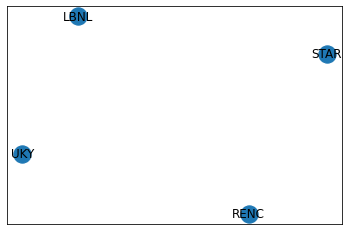

In [5]:
if status == Status.OK:
    advertised_topology.draw()

In [6]:
from fabrictestbed.slice_editor import ExperimentTopology, Capacities, ComponentType, ComponentModelType, ServiceType

Experiment = ExperimentTopology()

# Add node
S1Node1 = Experiment.add_node(name='S1Node1', site='LBNL')
S1Node2 = Experiment.add_node(name='S1Node2', site = 'LBNL')
S1Node3 = Experiment.add_node(name='S1Node3', site = 'LBNL')
S1Node4 = Experiment.add_node(name='S1Node4', site = 'UKY')

# Set capacities
cap = Capacities()
cap.set_fields(core=2, ram=16, disk=100)

# Set Properties
S1Node1.set_properties(capacities=cap, image_type='qcow2', image_ref='default_centos_8')
S1Node2.set_properties(capacities=cap, image_type='qcow2', image_ref='default_centos_8')
S1Node3.set_properties(capacities=cap, image_type='qcow2', image_ref='default_centos_8')
S1Node4.set_properties(capacities=cap, image_type='qcow2', image_ref='default_centos_8')

# Generate Slice Graph
slice_graph = Experiment.serialize()

ssh_key = None
with open ("/home/fabric/.ssh/id_rsa.pub", "r") as myfile:
    ssh_key=myfile.read()
    ssh_key=ssh_key.strip()

# Request slice from Orchestrator
status, reservations = slice_manager.create(slice_name='Slice 1', slice_graph=slice_graph, ssh_key=ssh_key)

print("Response Status {}".format(status))
if status == Status.OK:
    print("Reservations created {}".format(reservations))
else:
    print(f"Failure: {reservations}")
    
# NEXT RESOURCE ---------------------------------------------------------------------

Experiment = ExperimentTopology()

# Add node
S2Node1 = Experiment.add_node(name='S2Node1', site='LBNL')
S2Node2 = Experiment.add_node(name='S2Node2', site = 'LBNL')
S2Node3 = Experiment.add_node(name='S2Node3', site = 'UKY')
S2Node4 = Experiment.add_node(name='S2Node4', site = 'UKY')

# Set capacities
cap = Capacities()
cap.set_fields(core=3, ram=6, disk=10)

# Set Properties
S2Node1.set_properties(capacities=cap, image_type='qcow2', image_ref='default_centos_8')
S2Node2.set_properties(capacities=cap, image_type='qcow2', image_ref='default_centos_8')
S2Node3.set_properties(capacities=cap, image_type='qcow2', image_ref='default_centos_8')
S2Node4.set_properties(capacities=cap, image_type='qcow2', image_ref='default_centos_8')

# Generate Slice Graph
slice_graph = Experiment.serialize()

ssh_key = None
with open ("/home/fabric/.ssh/id_rsa.pub", "r") as myfile:
    ssh_key=myfile.read()
    ssh_key=ssh_key.strip()

# Request slice from Orchestrator
status, reservations = slice_manager.create(slice_name='Slice 2', slice_graph=slice_graph, ssh_key=ssh_key)

print("Response Status {}".format(status))
if status == Status.OK:
    print("Reservations created {}".format(reservations))
else:
    print(f"Failure: {reservations}")
    
# NEXT RESOURCE ---------------------------------------------------------------------

Experiment = ExperimentTopology()

# Add node
S3Node1 = Experiment.add_node(name='S3Node1', site='UKY')
S3Node2 = Experiment.add_node(name='S3Node2', site = 'UKY')
S3Node3 = Experiment.add_node(name='S3Node3', site = 'UKY')

# Set capacities
cap = Capacities()
cap.set_fields(core=3, ram=8, disk=20)

# Set Properties
S3Node1.set_properties(capacities=cap, image_type='qcow2', image_ref='default_centos_8')
S3Node2.set_properties(capacities=cap, image_type='qcow2', image_ref='default_centos_8')
S3Node3.set_properties(capacities=cap, image_type='qcow2', image_ref='default_centos_8')

# Generate Slice Graph
slice_graph = Experiment.serialize()

ssh_key = None
with open ("/home/fabric/.ssh/id_rsa.pub", "r") as myfile:
    ssh_key=myfile.read()
    ssh_key=ssh_key.strip()

# Request slice from Orchestrator
status, reservations = slice_manager.create(slice_name='Slice 3', slice_graph=slice_graph, ssh_key=ssh_key)

print("Response Status {}".format(status))
if status == Status.OK:
    print("Reservations created {}".format(reservations))
else:
    print(f"Failure: {reservations}")
    
# NEXT RESOURCE ---------------------------------------------------------------------
    
Experiment = ExperimentTopology()

# Add node
S4Node1 = Experiment.add_node(name='S4Node1', site='LBNL')
S4Node2 = Experiment.add_node(name='S4Node2', site='LBNL')

# Set capacities
cap = Capacities()
cap.set_fields(core=2, ram=6, disk=10)

# Set Properties
S4Node1.set_properties(capacities=cap, image_type='qcow2', image_ref='default_centos_8')
S4Node2.set_properties(capacities=cap, image_type='qcow2', image_ref='default_centos_8')

# Shared Cards
S4Node1.add_component(model_type=ComponentModelType.SharedNIC_ConnectX_6, name='S4Node1-nic1')
S4Node2.add_component(model_type=ComponentModelType.SharedNIC_ConnectX_6, name='S4Node2-nic1')

# L2Bridge Service
Experiment.add_network_service(name='bridge1', nstype=ServiceType.L2Bridge, interfaces=Experiment.interface_list)

# Generate Slice Graph
slice_graph = Experiment.serialize()

ssh_key = None
with open ("/home/fabric/.ssh/id_rsa.pub", "r") as myfile:
    ssh_key=myfile.read()
    ssh_key=ssh_key.strip()

# Request slice from Orchestrator
status, reservations = slice_manager.create(slice_name='Slice 4 (l2bridge-sriov)', slice_graph=slice_graph, ssh_key=ssh_key)

print("Response Status {}".format(status))
if status == Status.OK:
    print("Reservations created {}".format(reservations))
else:
    print(f"Failure: {reservations}")

Response Status Status.OK
Reservations created [{
    "graph_node_id": "d256b47c-b357-4951-a888-312e4aa64e0c",
    "lease_end": "2021-08-19 18:06:29",
    "pending_state": "None_",
    "reservation_id": "813d0ab2-2819-4a19-9a2e-6f46463c89a8",
    "reservation_state": "Unknown",
    "slice_id": "3c884e33-1f40-421a-89b9-586f81a2e019"
}, {
    "graph_node_id": "171d3a28-a49a-4770-be34-73b33424aab5",
    "lease_end": "2021-08-19 18:06:29",
    "pending_state": "None_",
    "reservation_id": "c8d9198e-48f9-4a20-8c95-3bf7a178c466",
    "reservation_state": "Unknown",
    "slice_id": "3c884e33-1f40-421a-89b9-586f81a2e019"
}, {
    "graph_node_id": "e2b21741-ce35-4466-b107-8303e7ee9ff9",
    "lease_end": "2021-08-19 18:06:29",
    "pending_state": "None_",
    "reservation_id": "2d242083-2b55-4cd0-939f-aa582f0dfb6f",
    "reservation_state": "Unknown",
    "slice_id": "3c884e33-1f40-421a-89b9-586f81a2e019"
}, {
    "graph_node_id": "aae4a5e5-0c3c-4e9e-bb85-c57ec3bdc3f6",
    "lease_end": "2021

In [11]:
status, slices = slice_manager.slices()
wanted = ['Slice 1', 'Slice 2', 'Slice 3', "Slice 4 (l2bridge-sriov)"]
for want in wanted:
    print(f'{want}: {want in [slice.slice_name for slice in slices]}')
    
print()

for slice in slices:
    print(slice.slice_name, slice.slice_id)

Slice 1: True
Slice 2: True
Slice 3: True
Slice 4 (l2bridge-sriov): True

Slice 2 0b06366f-7fbd-42ff-b497-87c8ea4df85d
Slice 3 0011f0e7-d3c6-484f-bd4a-183271d32515
Slice 1 3c884e33-1f40-421a-89b9-586f81a2e019
Slice 4 (l2bridge-sriov) e3ae8b3d-115b-4e66-a035-a6da986e171a


In [8]:
ids = [slice.slice_id for slice in slices]
for id in ids:
    status, t = slice_manager.get_slice(slice_id=id)
    print(t)

S1Node1[VM]:  { core: 2 , ram: 16 G, disk: 100 G}
S1Node2[VM]:  { core: 2 , ram: 16 G, disk: 100 G}
S1Node3[VM]:  { core: 2 , ram: 16 G, disk: 100 G}
S1Node4[VM]:  { core: 2 , ram: 16 G, disk: 100 G}
Links:
S2Node1[VM]:  { core: 3 , ram: 6 G, disk: 10 G}
S2Node2[VM]:  { core: 3 , ram: 6 G, disk: 10 G}
S2Node3[VM]:  { core: 3 , ram: 6 G, disk: 10 G}
S2Node4[VM]:  { core: 3 , ram: 6 G, disk: 10 G}
Links:
S3Node1[VM]:  { core: 3 , ram: 8 G, disk: 20 G}
S3Node2[VM]:  { core: 3 , ram: 8 G, disk: 20 G}
S3Node3[VM]:  { core: 3 , ram: 8 G, disk: 20 G}
Links:
S4Node1[VM]:  { core: 2 , ram: 6 G, disk: 10 G}
S4Node2[VM]:  { core: 2 , ram: 6 G, disk: 10 G}
Links:
	bridge1-S4Node1-nic1-p1-link[L2Path]: []
	bridge1-S4Node2-nic1-p1-link[L2Path]: []


In [9]:
s, at = slice_manager.resources()
for t in at.sites.values():
    print(t)

{'capacities': '{ cpu: 6 , core: 192 , ram: 1,536 G, disk: 9,600 G, unit: 3 }', 'capacity_allocations': '{ core: 20 , ram: 84 G, disk: 360 G}', 'location': '{"postal": "1 Cyclotron Rd, Berkeley, CA 94720"}', 'name': 'LBNL', 'site': 'LBNL', 'type': 'Server'}
{'capacities': '{ cpu: 6 , core: 192 , ram: 1,536 G, disk: 14,400 G, unit: 3 }', 'location': '{"postal": "100 Europa Dr., Chapel Hill, NC 27517"}', 'name': 'RENC', 'site': 'RENC', 'type': 'Server'}
{'name': 'STAR', 'site': 'STAR', 'type': 'Server'}
{'capacities': '{ cpu: 6 , core: 192 , ram: 1,536 G, disk: 9,600 G, unit: 3 }', 'capacity_allocations': '{ core: 21 , ram: 64 G, disk: 200 G}', 'location': '{"postal": "301 Hilltop Ave Lexington, KY 40506"}', 'name': 'UKY', 'site': 'UKY', 'type': 'Server'}
